In [1]:
import pandas as pd

In [2]:
CourseName = input("Enter a course name to see it's stats: ")

In [3]:
fullDF = pd.read_excel('PGAData2015-2022.xlsx')
CourseDF = fullDF[fullDF['course'] == CourseName]

In [4]:
CourseDF.head()

,Player_initial_last,tournament id,player id,hole_par,strokes,hole_DKP,hole_FDP,hole_SDP,streak_DKP,streak_FDP,...,purse,season,no_cut,Finish,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
993,A. Cook,401353221,9517,280,279,64.5,56.7,60,3,13.2,...,8.3,2022,0,63,-0.12,-0.04,-0.16,-0.08,-0.28,-0.40
994,A. Lahiri,401353221,4989,140,143,22.0,16.9,28,3,5.4,...,8.3,2022,0,CUT,-1.01,-1.13,-0.01,0.10,-1.03,-2.04
995,A. Landry,401353221,4682,140,141,27.5,24.1,30,0,0.6,...,8.3,2022,0,CUT,1.15,-1.32,-0.81,-0.07,-2.19,-1.04
996,A. Long,401353221,6015,280,272,72.5,66.3,73,6,18.2,...,8.3,2022,0,T25,2.28,-0.50,-0.65,0.23,-0.93,1.35
997,A. Putnam,401353221,5502,280,276,60.0,55.8,68,6,11.6,...,8.3,2022,0,T46,-0.58,0.53,0.45,-0.04,0.93,0.35


In [6]:
averageStats = CourseDF.groupby('Finish').mean()
averageStats.head()

C:\Users\fieng\AppData\Local\Temp\ipykernel_14012\2603966571.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  averageStats = CourseDF.groupby('Finish').mean()


,tournament id,player id,hole_par,strokes,hole_DKP,hole_FDP,hole_SDP,streak_DKP,streak_FDP,streak_SDP,...,Unnamed: 4,purse,season,no_cut,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
Finish,,,,,,,,,,,,,,,,,,,,,
1,2.674143e+08,3392.5,280.0,264.666667,84.083333,82.783333,81.50,7.833333,18.0,5.00,...,NaN,7.066667,2018.5,0.0,0.97,0.676667,1.193333,0.501667,2.376667,3.3450
2,2.006010e+08,5177.0,280.0,266.000000,82.125000,79.725000,81.25,5.250000,13.7,1.75,...,NaN,7.050000,2018.5,0.0,1.36,0.102500,0.950000,0.535000,1.585000,2.9475
3,4.012434e+08,3351.0,280.0,268.000000,76.500000,74.900000,77.00,8.000000,21.4,4.00,...,NaN,7.400000,2021.0,0.0,1.31,0.260000,0.060000,1.120000,1.440000,2.7500
4,4.011500e+08,5223.0,280.0,268.500000,81.250000,77.300000,74.50,8.000000,16.1,3.00,...,NaN,7.300000,2020.0,0.0,1.00,0.190000,0.980000,0.505000,1.675000,2.6700
5,4.012543e+08,3011.0,280.0,265.000000,81.500000,80.600000,83.00,9.500000,21.7,6.00,...,NaN,7.850000,2021.0,0.0,1.50,0.640000,0.590000,-0.015000,1.215000,2.7100


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

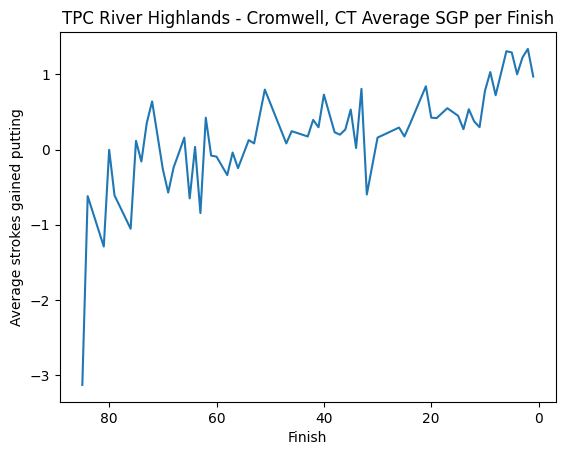

In [13]:
#testing a line plot

# create a copy of the averageStats DataFrame and remove "T" and "cut" values from the index
averageStats_copy = averageStats.copy()
averageStats_copy.index = averageStats_copy.index.astype(str)
averageStats_copy.index = averageStats_copy.index.str.replace("CUT", "80").str.replace("W/D", "80").str.replace("WD", "80").str.replace("DQ", "80").str.replace("MDF", "80").str.replace("T", "").astype(int)
averageStats_copy = averageStats_copy.groupby(averageStats_copy.index).mean()
plt.plot(averageStats_copy.index, averageStats_copy["sg_putt"])
# add labels and title
plt.xlabel("Finish")
plt.ylabel("Average strokes gained putting")
plt.title(CourseName + " Average SGP per Finish")

plt.gca().invert_xaxis()
plt.show()